In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from random import randint
import math

In [4]:
data = pd.read_csv("cm_dataset_2.csv")
data = np.array(data)
n = len(data)

(1000, 2)

### Initialization, Error function and plotting function

In [59]:
def init(z):
    for i in range(n):
        z[i] = randint(0,1)
    return z

def Error(data,z,mean):
    ans = 0
    for i in range(n):
        ans += np.linalg.norm(data[i]-mean[int(z[i])])**2
    return ans

def plot_cluster(data,z):
    for i in range(n):
        if z[i]==0:
          plt.scatter(data[i][0],data[i][1],c="red")
        else:
          plt.scatter(data[i][0],data[i][1],c="blue")
          plt.title(f"k = {2}")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

def plot_error(iteration,temp):
   error = np.zeros((iteration,2))
   for i in range(iteration):
       error[i][0] = temp[i]
       error[i][1] = i+1
   plt.plot(error[:,1],error[:,0])
   plt.show()

### K-Means Algorithm

In [60]:
def K_Means(data,error,k):
   iteration = 0 
   z = np.zeros((n))
   init(z)
   while(1):
       mean = np.zeros((k,2))
       cnt = np.zeros((k))
       for i in range(n):
           x = int(z[i])
           mean[x] += data[i]
           cnt[x] += 1
       for i in range(k):
           if cnt[i]==0: cnt[i]=1
           mean[i][0] = mean[i][0]/cnt[i]
           mean[i][1] = mean[i][1]/cnt[i]
       check = 0
       for i in range(n):
           temp1 = z[i]
           x = np.linalg.norm(data[i] - mean[int(z[i])]) ** 2
           for j in range(k):
               if np.linalg.norm(data[i] - mean[j]) ** 2 < x: 
                   z[i] = j
           if temp1==z[i]:
               check += 1
       if check==n:
           break
       error[iteration][0] = Error(data,z,mean)
       error[iteration][1] = iteration 
       iteration += 1
   return z

### i. 5 different random initialization with k=2

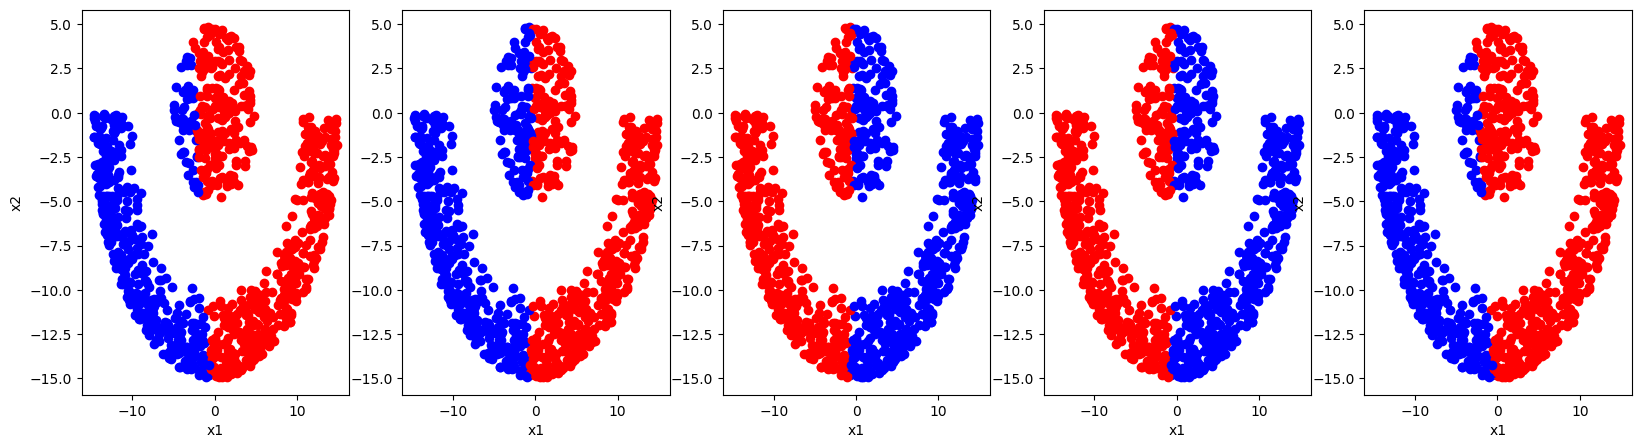

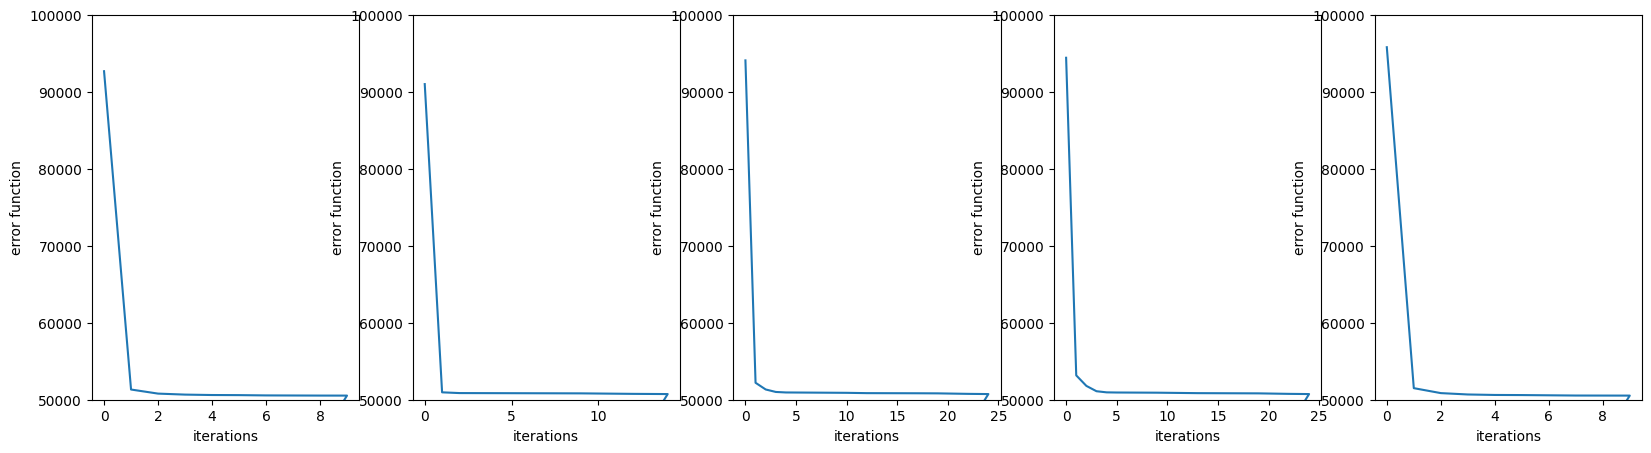

In [61]:
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows = 1, ncols = 5, figsize=(20,5))
fig,(err1,err2,err3,err4,err5) = plt.subplots(nrows = 1, ncols = 5, figsize=(20,5))
for i in range(5):
    if i==0:
       error = np.zeros((n,2))
       z = K_Means(data,error,k=2)
       for i in range(n):
          if z[i]==0: ax1.scatter(data[i][0],data[i][1],c="red")
          else: ax1.scatter(data[i][0],data[i][1],c="blue")
       ax1.set_xlabel('x1')
       ax1.set_ylabel('x2')
       err1.plot(error[:,1],error[:,0])
       err1.set_xlabel('iterations')
       err1.set_ylabel('error function')
       err1.set_ylim(50000,100000)
    elif i==1:
       error = np.zeros((n,2))
       z = K_Means(data,error,k=2)
       for i in range(n):
          if z[i]==0: ax2.scatter(data[i][0],data[i][1],c="red")
          else: ax2.scatter(data[i][0],data[i][1],c="blue")
       ax2.set_xlabel('x1')
       ax3.set_ylabel('x2')
       err2.plot(error[:,1],error[:,0])
       err2.set_xlabel('iterations')
       err2.set_ylabel('error function')
       err2.set_ylim(50000,100000)
    elif i==2:
       error = np.zeros((n,2))
       z = K_Means(data,error,k=2)
       for i in range(n):
          if z[i]==0: ax3.scatter(data[i][0],data[i][1],c="red")
          else: ax3.scatter(data[i][0],data[i][1],c="blue")
       ax3.set_xlabel('x1')
       ax3.set_ylabel('x2')
       err3.plot(error[:,1],error[:,0])
       err3.set_xlabel('iterations')
       err3.set_ylabel('error function')
       err3.set_ylim(50000,100000)
    elif i==3:
       error = np.zeros((n,2))
       z = K_Means(data,error,k=2)
       for i in range(n):
          if z[i]==0: ax4.scatter(data[i][0],data[i][1],c="red")
          else: ax4.scatter(data[i][0],data[i][1],c="blue")
       ax4.set_xlabel('x1')
       ax4.set_ylabel('x2')
       err4.plot(error[:,1],error[:,0])
       err4.set_xlabel('iterations')
       err4.set_ylabel('error function')
       err4.set_ylim(50000,100000)
    elif i==4:
       error = np.zeros((n,2))
       z = K_Means(data,error,k=2)
       for i in range(n):
          if z[i]==0: ax5.scatter(data[i][0],data[i][1],c="red")
          else: ax5.scatter(data[i][0],data[i][1],c="blue")
       ax5.set_xlabel('x1')
       ax5.set_ylabel('x2')
       err5.plot(error[:,1],error[:,0])
       err5.set_xlabel('iterations')
       err5.set_ylabel('error function')
       err5.set_ylim(50000,100000)

### ii. Fixed random initialization with k = {2,3,4,5}

In [62]:
def K_Means_fixed_init(data,z,cluster_center,k):
   while(1):
       mean = np.zeros((k,2))
       cnt = np.zeros((k))
       for i in range(n):
           x = int(z[i])
           mean[x] += data[i]
           cnt[x] += 1
       for i in range(k):
           if cnt[i]==0: cnt[i]=1
           mean[i][0] = mean[i][0]/cnt[i]
           mean[i][1] = mean[i][1]/cnt[i]
       check = 0
       for i in range(n):
           temp1 = z[i]
           x = np.linalg.norm(data[i] - mean[int(z[i])]) ** 2
           for j in range(k):
               if np.linalg.norm(data[i] - mean[j]) ** 2 < x: 
                   z[i] = j
           if temp1==z[i]:
               check += 1
       if check==n:
           break
   cnt = np.zeros((k))
   for i in range(n):
       cluster_center[int(z[i])] += data[i]
       cnt[int(z[i])] += 1
   for i in range(k):
        if cnt[i]==0: cnt[i]=1
        cluster_center[i][0] = cluster_center[i][0]/cnt[i]
        cluster_center[i][1] = cluster_center[i][1]/cnt[i]
   return z

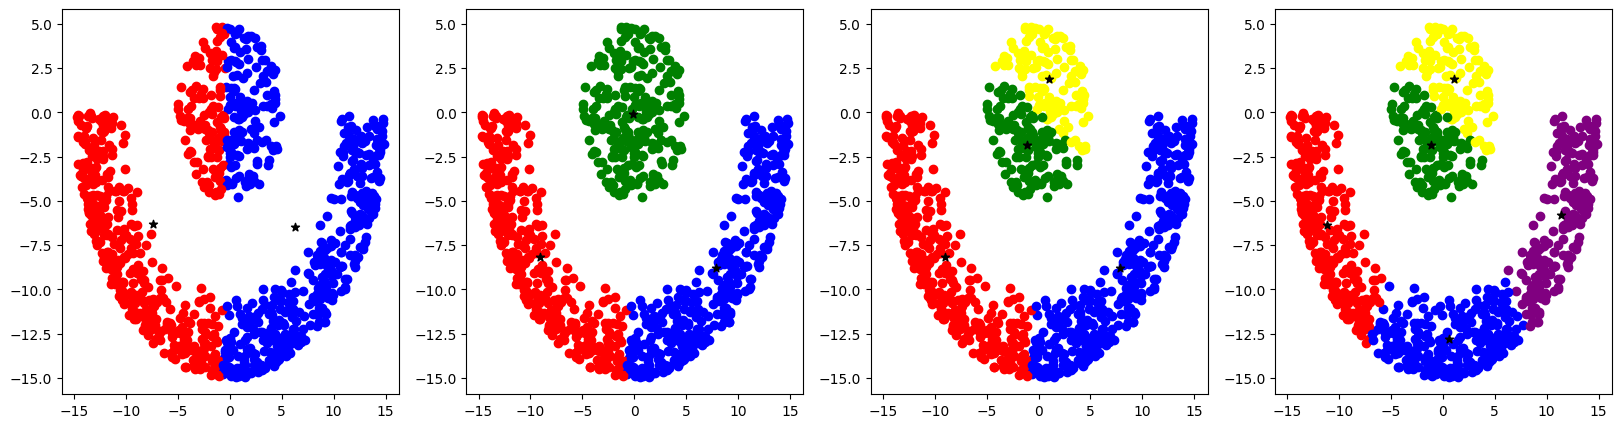

In [63]:
zi = np.zeros((n))
init(zi)
fig,(img1,img2,img3,img4) = plt.subplots(nrows = 1, ncols = 4, figsize=(20,5))
for i in range(4):
    if i==0:
        cluster_center = np.zeros((i+2,2))
        z = K_Means_fixed_init(data,zi,cluster_center,k=2)
        for i in range(n):
           if z[i]==0: img1.scatter(data[i][0],data[i][1],c="red")
           else: img1.scatter(data[i][0],data[i][1],c="blue")
        img1.scatter(cluster_center[:,0],cluster_center[:,1],marker='*',color='black')
    elif i==1:
        cluster_center = np.zeros((i+2,2))
        z = K_Means_fixed_init(data,zi,cluster_center,k=3)
        for i in range(n):
           if z[i]==0: img2.scatter(data[i][0],data[i][1],c="red")
           elif z[i]==1: img2.scatter(data[i][0],data[i][1],c="blue")
           else: img2.scatter(data[i][0],data[i][1],c="green")
        img2.scatter(cluster_center[:,0],cluster_center[:,1],marker='*',color='black')
    elif i==2:
        cluster_center = np.zeros((i+2,2))
        z = K_Means_fixed_init(data,zi,cluster_center,k=4)
        for i in range(n):
           if z[i]==0: img3.scatter(data[i][0],data[i][1],c="red")
           elif z[i]==1: img3.scatter(data[i][0],data[i][1],c="blue")
           elif z[i]==2: img3.scatter(data[i][0],data[i][1],c="green")
           else: img3.scatter(data[i][0],data[i][1],c="yellow")
        img3.scatter(cluster_center[:,0],cluster_center[:,1],marker='*',color='black')
    elif i==3:
        cluster_center = np.zeros((i+2,2))
        z = K_Means_fixed_init(data,zi,cluster_center,k=5)
        for i in range(n):
           if z[i]==0: img4.scatter(data[i][0],data[i][1],c="red")
           elif z[i]==1: img4.scatter(data[i][0],data[i][1],c="blue")
           elif z[i]==2: img4.scatter(data[i][0],data[i][1],c="green")
           elif z[i]==3: img4.scatter(data[i][0],data[i][1],c="yellow")
           else: img4.scatter(data[i][0],data[i][1],c="purple")
        img4.scatter(cluster_center[:,0],cluster_center[:,1],marker='*',color='black')

## iii. Spectral Clustering

In [64]:
def quadratic_kernel(x,y):
    return int(1+np.dot(x.T,y))**2

def kernel_matrix(X, kernel_func, **kwargs):
    n_samples = X.shape[0]
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = kernel_func(X[i], X[j], **kwargs)
    return K

### Compute the H matrix from kernel matrix

In [65]:
K_quadratic = kernel_matrix(data,quadratic_kernel)
eigenvalue,eigenvector = np.linalg.eig(K_quadratic)
H = np.zeros((n,2))
H[:,0] = eigenvector[:,0]
H[:,1] = eigenvector[:,1]
print(H)

[[-0.00173589  0.00080584]
 [-0.00258131 -0.00329861]
 [-0.00388749 -0.00516867]
 ...
 [-0.04547665  0.04617749]
 [-0.03880534 -0.03194715]
 [-0.03761832  0.0392901 ]]


### Normalize the rows of H

Error = 
53769.29337547361


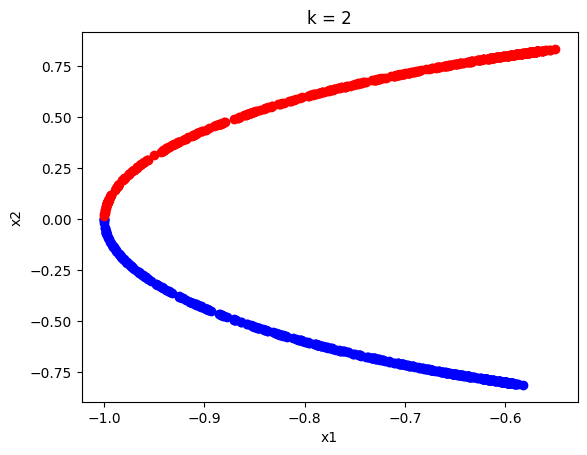

In [70]:
for i in range(n):
    x = math.sqrt(H[i][0]**2 + H[i][1]**2)
    H[i][0] /= x
    H[i][1] /= x
error = np.zeros((n,2))
z = K_Means(H,error,k=2)
cnt = np.zeros((2))
cluster_mean = np.zeros((n,2))
for i in range(n):
    cluster_mean[int(z[i])] += data[i]
    cnt[int(z[i])] += 1
for i in range(2):
    if cnt[i]==0: cnt[i]=1
    cluster_mean[i][0] = cluster_mean[i][0]/cnt[i]
    cluster_mean[i][1] = cluster_mean[i][1]/cnt[i]
# Error calculation for spectral clustering
print(Error(H,z,cluster_mean))
plot_cluster(H,z)

### iv. Variation in spectral clustering

54001.96669171018


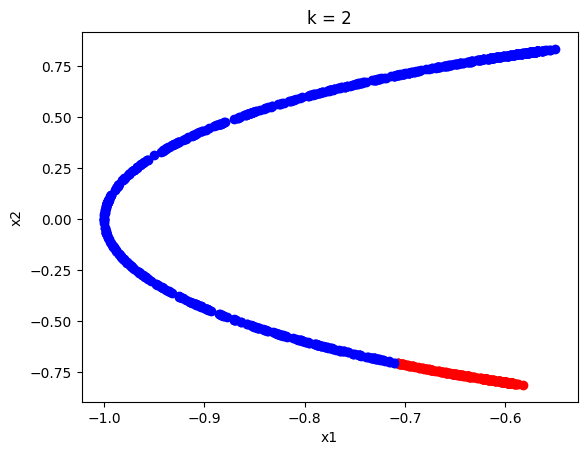

In [68]:
z_new = np.zeros((n))
for i in range(n):
    if H[i][0]>H[i][1]:
        z_new[i] = 0
    else:
        z_new[i] = 1
cnt = np.zeros((2))
cluster_mean_new = np.zeros((n,2))
for i in range(n):
    cluster_mean_new[int(z_new[i])] += data[i]
    cnt[int(z_new[i])] += 1
for i in range(2):
    if cnt[i]==0: cnt[i]=1
    cluster_mean_new[i][0] = cluster_mean_new[i][0]/cnt[i]
    cluster_mean_new[i][1] = cluster_mean_new[i][1]/cnt[i]
print(Error(H,z_new,cluster_mean_new))
plot_cluster(H,z_new)